In [131]:
import numpy as np
import pandas as pd
from catboost import CatBoostClassifier, Pool, cv
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [132]:
dataset = pd.read_csv('for_model.csv')
dataset

,COL_756,COL_757,COL_758,COL_759,COL_760,COL_761,COL_762,COL_763,COL_764,COL_766,...,COL_2463,COL_3163,COL_3243,COL_3363,COL_3468,WORK_NAME,CREATE_DATE,CLOSE_DATE,SOURCE,WORK_CLASS
0,87,1,2048912,5,4,64,3588,1308,599,1,...,3,58761330,45063584,0,0,205.0,127.0,128.0,0.0,24.0
1,87,1,2048912,5,4,64,3588,1308,599,1,...,3,58761330,45063584,0,0,205.0,128.0,129.0,0.0,24.0
2,87,1,2048912,5,4,64,3588,1308,599,1,...,3,58761330,45063584,0,0,205.0,128.0,129.0,0.0,24.0
3,87,1,2048912,5,4,64,3588,1308,599,1,...,3,58761330,45063584,0,0,177.0,128.0,129.0,0.0,24.0
4,87,1,2048912,5,4,64,3588,1308,599,1,...,3,58761330,45063584,0,0,45.0,128.0,130.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053713,139,1,0,0,0,0,6022,3381,3882,1,...,3,58761330,45063584,0,0,115.0,222.0,255.0,7.0,5.0
1053714,139,1,0,0,0,0,6022,3381,3882,1,...,3,58761330,45063584,0,0,108.0,87.0,174.0,7.0,15.0
1053715,139,1,0,0,0,0,6022,3381,3882,1,...,3,58761330,45063584,0,0,108.0,89.0,174.0,7.0,15.0
1053716,139,1,0,0,0,0,6022,3381,3882,1,...,3,58761330,45063584,0,0,312.0,104.0,209.0,7.0,5.0


<Axes: xlabel='UNOM', ylabel='WORK_CLASS'>

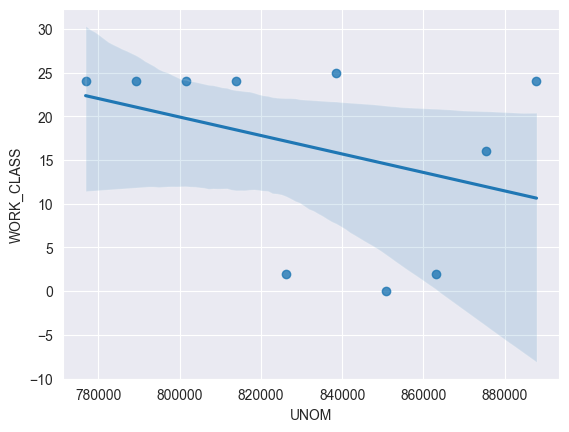

In [133]:
X = dataset.drop(columns='WORK_CLASS').copy()
y = dataset['WORK_CLASS']
# sns.scatterplot(x='UNOM',y='WORK_CLASS',data=dataset[:10])
# sns.histplot(dataset['WORK_CLASS'])
sns.regplot(x='UNOM',y='WORK_CLASS',data=dataset[:10])

In [134]:
x, x_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=4212)

In [135]:
params_cb = {
        'loss_function': 'MultiClass',
        'eval_metric': 'Accuracy',
        'iterations': 500,
    }
model = CatBoostClassifier(**params_cb)
train_pool = Pool(
        data=x,
        label=y
)
test_pool = Pool(
        data=x_test,
        label=y_test
)
model.fit(
    train_pool,
    eval_set=test_pool,
    verbose=False,
    plot=True,
    use_best_model=True,
)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [136]:
from catboost import CatBoostClassifier, Pool, cv
model.get_feature_importance(prettified=True)
# model.get_feature_importance(type='LossFunctionChange',prettified=True, data=test_pool)
# model.plot_tree(
#     tree_idx=0,
#     pool=test_pool
# )
# model.get_roc_curve()
# cv_params = model.get_params()
# cv_data = cv(
#     Pool(X, y, cat_features=None), 
#     cv_params, 
#     fold_count=5, 
#     plot=True)

,Feature Id,Importances
0,WORK_NAME,53.978667
1,SOURCE,40.008495
2,CLOSE_DATE,2.571050
3,CREATE_DATE,1.249373
4,COL_775,0.322323
5,COL_759,0.287798
6,COL_3243,0.278423
7,UNOM,0.269256
8,COL_771,0.250275
9,COL_761,0.160860


In [137]:

# predict_dataset = pd.read_csv('for_test.csv')
# predict_d = predict_dataset.drop(columns='WORK_CLASS').copy()
y_pred = model.predict(x_test)
# predict_dataset['WORK_CLASS_PREDICT'] = res
# predict_dataset
y_pred

array([[ 0.],
       [16.],
       [16.],
       ...,
       [24.],
       [24.],
       [24.]])

In [160]:
res = model.predict([124,1,2048798,18,2,148,5523,3131,2629,1,0,15,22728486,2,7,2,0,2950808,3,58761330,45063584,0,0,220.0,30.0,32.0,3.0])
list(res)

[2.0]

In [161]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.9998339217249365

In [140]:
# import shap
# 
# explainer = shap.Explainer(model, X_train[:1])
# shap_values = explainer(X_validation[:1])
# 
# explainer.expected_value

In [141]:
# index_to_explain = 0  # Индекс объекта в X_test для анализа
# shap_value = shap_values[index_to_explain]
# 
# # Использование новой функции force plot из shap.plots
# shap.plots.force(shap_value)

In [142]:
# import shap
# shap_values = model.get_feature_importance(Pool(x[:10], y[:10]), type='ShapValues')
# 
# 
# shap_values = shap_values[:,:,:-1]

In [143]:
# shap.summary_plot(shap_values[:,13], x[:10])

In [144]:
# shap.summary_plot(shap_values[:,12], x[:10])

In [145]:
model.save_model("best.cbm")

In [147]:
test_df = pd.read_csv('for_test.csv')
test_df

,COL_756,COL_757,COL_758,COL_759,COL_760,COL_761,COL_762,COL_763,COL_764,COL_766,...,COL_2463,COL_3163,COL_3243,COL_3363,COL_3468,WORK_NAME,CREATE_DATE,CLOSE_DATE,SOURCE,WORK_CLASS
0,124,1,2048798,18,2,148,5523,3131,2629,1,...,3,58761330,45063584,0,0,197.0,0.0,1.0,3.0,25.0
1,124,1,2048798,18,2,148,5523,3131,2629,1,...,3,58761330,45063584,0,0,111.0,0.0,1.0,3.0,23.0
2,124,1,2048798,18,2,148,5523,3131,2629,1,...,3,58761330,45063584,0,0,140.0,0.0,1.0,3.0,23.0
3,124,1,2048798,18,2,148,5523,3131,2629,1,...,3,58761330,45063584,0,0,4.0,1.0,2.0,3.0,2.0
4,124,1,2048798,18,2,148,5523,3131,2629,1,...,3,58761330,45063584,0,0,298.0,2.0,3.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,87,1,2048912,5,4,64,3588,1308,599,1,...,3,58761330,45063584,0,0,177.0,125.0,126.0,0.0,24.0
996,87,1,2048912,5,4,64,3588,1308,599,1,...,3,58761330,45063584,0,0,205.0,125.0,126.0,0.0,24.0
997,87,1,2048912,5,4,64,3588,1308,599,1,...,3,58761330,45063584,0,0,177.0,125.0,126.0,0.0,24.0
998,87,1,2048912,5,4,64,3588,1308,599,1,...,3,58761330,45063584,0,0,205.0,127.0,128.0,0.0,24.0


In [150]:
y_test_2 = test_df['WORK_CLASS']
x_test_2 = test_df.drop(columns='WORK_CLASS').copy()

y_predict_2 = model.predict(x_test_2)
y_predict_2

array([[25.],
       [23.],
       [23.],
       [ 2.],
       [ 0.],
       [15.],
       [15.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [15.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [15.],
       [23.],
       [25.],
       [25.],
       [25.],
       [ 8.],
       [25.],
       [25.],
       [ 2.],
       [25.],
       [23.],
       [23.],
       [16.],
       [23.],
       [23.],
       [23.],
       [23.],
       [25.],
       [25.],
       [25.],
       [ 8.],
       [ 2.],
       [17.],
       [17.],
       [ 8.],
       [ 2.],
       [11.],
       [25.],
       [25.],
       [25.],
       [25.],
       [23.],
       [23.],
       [23.],
       [ 2.],
       [25.],
       [25.],
       [25.],
       [ 0.],
       [23.],
       [23.],
       [ 8.],
       [ 8.],
       [ 8.],
       [25.],
       [ 2.],
       [ 8.],
       [25.],
      

In [154]:
accuracy = accuracy_score(y_test_2, y_predict_2)
accuracy

1.0

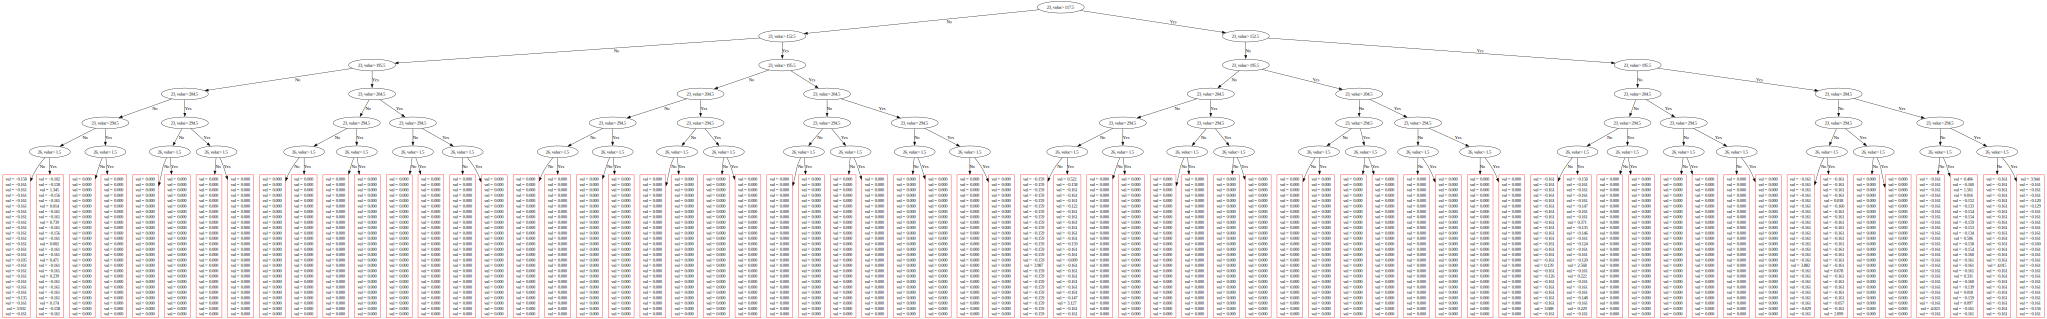

In [162]:
model.plot_tree(
    tree_idx=0,
    # pool=test_pool
)